# Heart Attack Prediction - Cleveland vs Hungary database?

Data source: https://www.kaggle.com/datasets/imnikhilanand/heart-attack-prediction

This database contains *76 attributes*, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The *"goal"* field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Experiments with the **Cleveland database** have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). One file has been *"processed"*, that one containing the Cleveland database.

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

**Attribute information:** 

1. **age**: age in years
2. **sex**: sex (1 = male; 0 = female)
3. **cp**: chest pain type
    - *Value 1*: typical angina
    - *Value 2*: atypical angina
    - *Value 3*: non-anginal pain
    - *Value 4*: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the
hospital)
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
    - *Value 0*: normal
    - *Value 1*: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - *Value 2*: showing probable or definite left ventricular hypertrophy
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment
    - *Value 1*: upsloping
    - *Value 2*: flat
    - *Value 3*: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. **num**: diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing 
    - Value 1: > 50% diameter narrowing

**Source Information**:

(a) Creators:
   1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
   2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
   3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
   4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

(b) Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779

(c) Date: July, 1988

In [1]:
import pandas as pd
class_dtb = {
    'Distribution': ['0', '1', '2', '3', '4', 'Total'],
    'Cleveland': ['164', '55', '36', '35', '13', '303'],
    'Hungary': ['188', '37', '26', '28', '15', '294'],
    'Switzerland': ['8', '48', '32', '30', '5', '123'],
    'Long Beach VA': ['51', '56', '41', '42', '10', '200']
}

In [2]:
df_classdtb2 = pd.DataFrame(class_dtb)
df_classdtb2.set_index("Distribution").round(2)

,Cleveland,Hungary,Switzerland,Long Beach VA
Distribution,,,,
0,164,188,8,51
1,55,37,48,56
2,36,26,32,41
3,35,28,30,42
4,13,15,5,10
Total,303,294,123,200


## 1. Preparación del dataset

In [3]:
# LIBRERIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder 

In [4]:
heart_attack_path = "data.csv"
df = pd.read_csv(heart_attack_path, sep=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [6]:
df['num       '].value_counts()

num       
0    188
1    106
Name: count, dtype: int64

In [7]:
df.shape

(294, 14)

In [8]:
# Renombrar target variable
df.rename({'num       ': 'target'}, axis=1, inplace=True) 
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
# Reemplazar '?' por nan
df.replace('?', np.nan, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    object 
 4   chol      271 non-null    object 
 5   fbs       286 non-null    object 
 6   restecg   293 non-null    object 
 7   thalach   293 non-null    object 
 8   exang     293 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    object 
 11  ca        3 non-null      object 
 12  thal      28 non-null     object 
 13  target    294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


### Detección y tratamiento de nulos

In [11]:
# Eliminar columnas
df.drop(columns=['ca', 'thal', 'slope'], inplace=True)

In [12]:
# Revisando filas
df.isnull().sum().sort_values().sort_values(ascending=False)

chol        23
fbs          8
trestbps     1
restecg      1
thalach      1
exang        1
age          0
sex          0
cp           0
oldpeak      0
target       0
dtype: int64

#### *chol*: Serum cholestoral in mg/dl

In [13]:
df['chol'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 294 entries, 0 to 293
Series name: chol
Non-Null Count  Dtype 
--------------  ----- 
271 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB


In [14]:
df.chol.value_counts()

chol
246    5
230    5
275    5
238    4
196    4
      ..
468    1
259    1
100    1
210    1
393    1
Name: count, Length: 153, dtype: int64

In [15]:
df['chol'] = pd.to_numeric(df.chol, errors='coerce') # los no convertibles a NaN

In [16]:
df.chol.info()

<class 'pandas.core.series.Series'>
RangeIndex: 294 entries, 0 to 293
Series name: chol
Non-Null Count  Dtype  
--------------  -----  
271 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [17]:
df.chol.describe().round()

count    271.0
mean     251.0
std       68.0
min       85.0
25%      209.0
50%      243.0
75%      282.0
max      603.0
Name: chol, dtype: float64

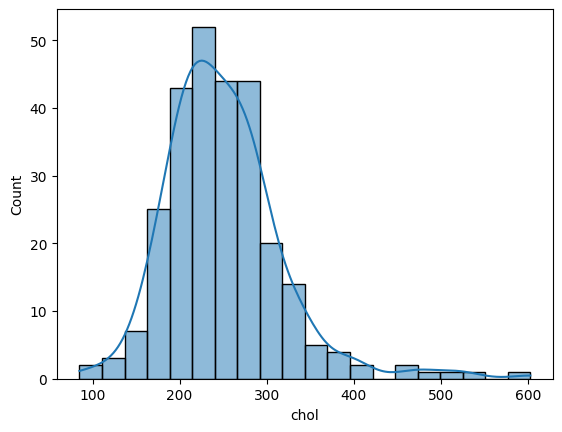

In [18]:
sns.histplot(df['chol'], bins=20, kde=True)
plt.show()

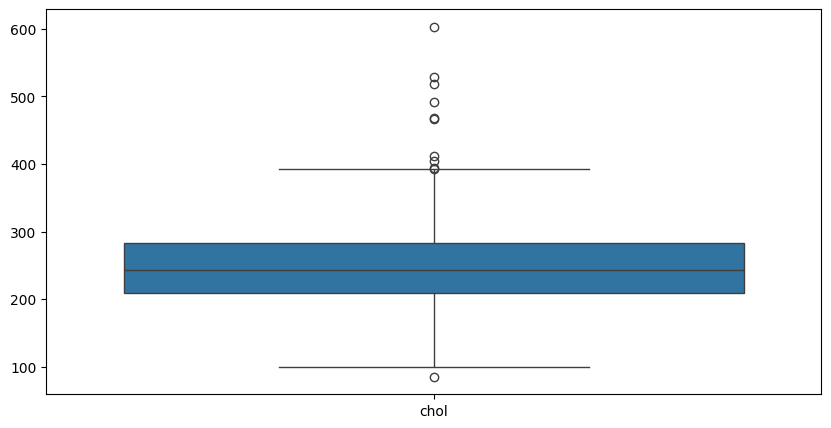

In [19]:
# Podéis hacerlo de una sola variable
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["chol"]])
plt.show()

In [20]:
df.chol.fillna(df.chol.median(), inplace=True)

/var/folders/f1/x77kh9w17j56ckntc3dq_ztm0000gn/T/ipykernel_7810/2649995948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.chol.fillna(df.chol.median(), inplace=True)


#### *fbs*: Fasting blood sugar > 120 mg/dl: 1 = true; 0 = false

In [21]:
df.fbs.describe()

count     286
unique      2
top         0
freq      266
Name: fbs, dtype: object

In [22]:
df.fbs.value_counts()

fbs
0    266
1     20
Name: count, dtype: int64

In [23]:
df['fbs'] = pd.to_numeric(df.fbs, errors='coerce')

In [24]:
df.fbs.fillna(0, inplace=True)  # Reemplazado vacios con moda

/var/folders/f1/x77kh9w17j56ckntc3dq_ztm0000gn/T/ipykernel_7810/2963398460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.fbs.fillna(0, inplace=True)  # Reemplazado vacios con moda


#### Others: *restecg* (resting electrocardiographic results - 0,1,2)

In [25]:
df.isnull().sum().sort_values(ascending=False)

trestbps    1
restecg     1
thalach     1
exang       1
age         0
sex         0
cp          0
chol        0
fbs         0
oldpeak     0
target      0
dtype: int64

In [26]:
df['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')

In [27]:
df.trestbps.fillna(df.trestbps.median(), inplace=True)

/var/folders/f1/x77kh9w17j56ckntc3dq_ztm0000gn/T/ipykernel_7810/2058663076.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.trestbps.fillna(df.trestbps.median(), inplace=True)


In [28]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,48,0,2,130.0,308.0,0.0,1,NaN,NaN,2.0,0
268,55,1,1,140.0,295.0,0.0,NaN,136,0,0.0,1


In [29]:
df.restecg.value_counts()

restecg
0    235
1     52
2      6
Name: count, dtype: int64

In [30]:
df.restecg.fillna(0, inplace=True)  # Reemplazado vacios con moda

/var/folders/f1/x77kh9w17j56ckntc3dq_ztm0000gn/T/ipykernel_7810/3576171895.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.restecg.fillna(0, inplace=True)  # Reemplazado vacios con moda


In [31]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,48,0,2,130.0,308.0,0.0,1,NaN,NaN,2.0,0


In [32]:
#df.dropna(thresh=2, inplace = True)  # Si la fila tiene mas de un missing la elimina
df.drop(df.index[[90]], inplace=True)

In [33]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


### Detección y eliminación de duplicados

In [34]:
df.duplicated().sum()

np.int64(1)

In [35]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
101,49,0,2,110.0,243.0,0.0,0,160,0,0.0,0
102,49,0,2,110.0,243.0,0.0,0,160,0,0.0,0


In [36]:
# Eliminamos duplicados completos primero
df = df.drop_duplicates().copy()

### Convertir obj variables to numeric

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       292 non-null    int64  
 1   sex       292 non-null    int64  
 2   cp        292 non-null    int64  
 3   trestbps  292 non-null    float64
 4   chol      292 non-null    float64
 5   fbs       292 non-null    float64
 6   restecg   292 non-null    object 
 7   thalach   292 non-null    object 
 8   exang     292 non-null    object 
 9   oldpeak   292 non-null    float64
 10  target    292 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 27.4+ KB


In [38]:
cols_to_numeric = ['trestbps', 'restecg', 'thalach', 'exang']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [39]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,292.0,47.82,7.84,28.0,42.0,49.0,54.0,66.0
sex,292.0,0.73,0.45,0.0,0.0,1.0,1.0,1.0
cp,292.0,2.99,0.96,1.0,2.0,3.0,4.0,4.0
trestbps,292.0,132.66,17.61,92.0,120.0,130.0,140.0,200.0
chol,292.0,250.06,65.12,85.0,211.0,243.0,277.0,603.0
fbs,292.0,0.07,0.25,0.0,0.0,0.0,0.0,1.0
restecg,292.0,0.22,0.46,0.0,0.0,0.0,0.0,2.0
thalach,292.0,139.06,23.60,82.0,122.0,140.0,155.0,190.0
exang,292.0,0.30,0.46,0.0,0.0,0.0,1.0,1.0
oldpeak,292.0,0.58,0.91,0.0,0.0,0.0,1.0,5.0


### EDA

In [40]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'target'],
      dtype='object')

In [41]:
# Separar variables categoricas y numericas
df_num = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
df_cat = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'target']]

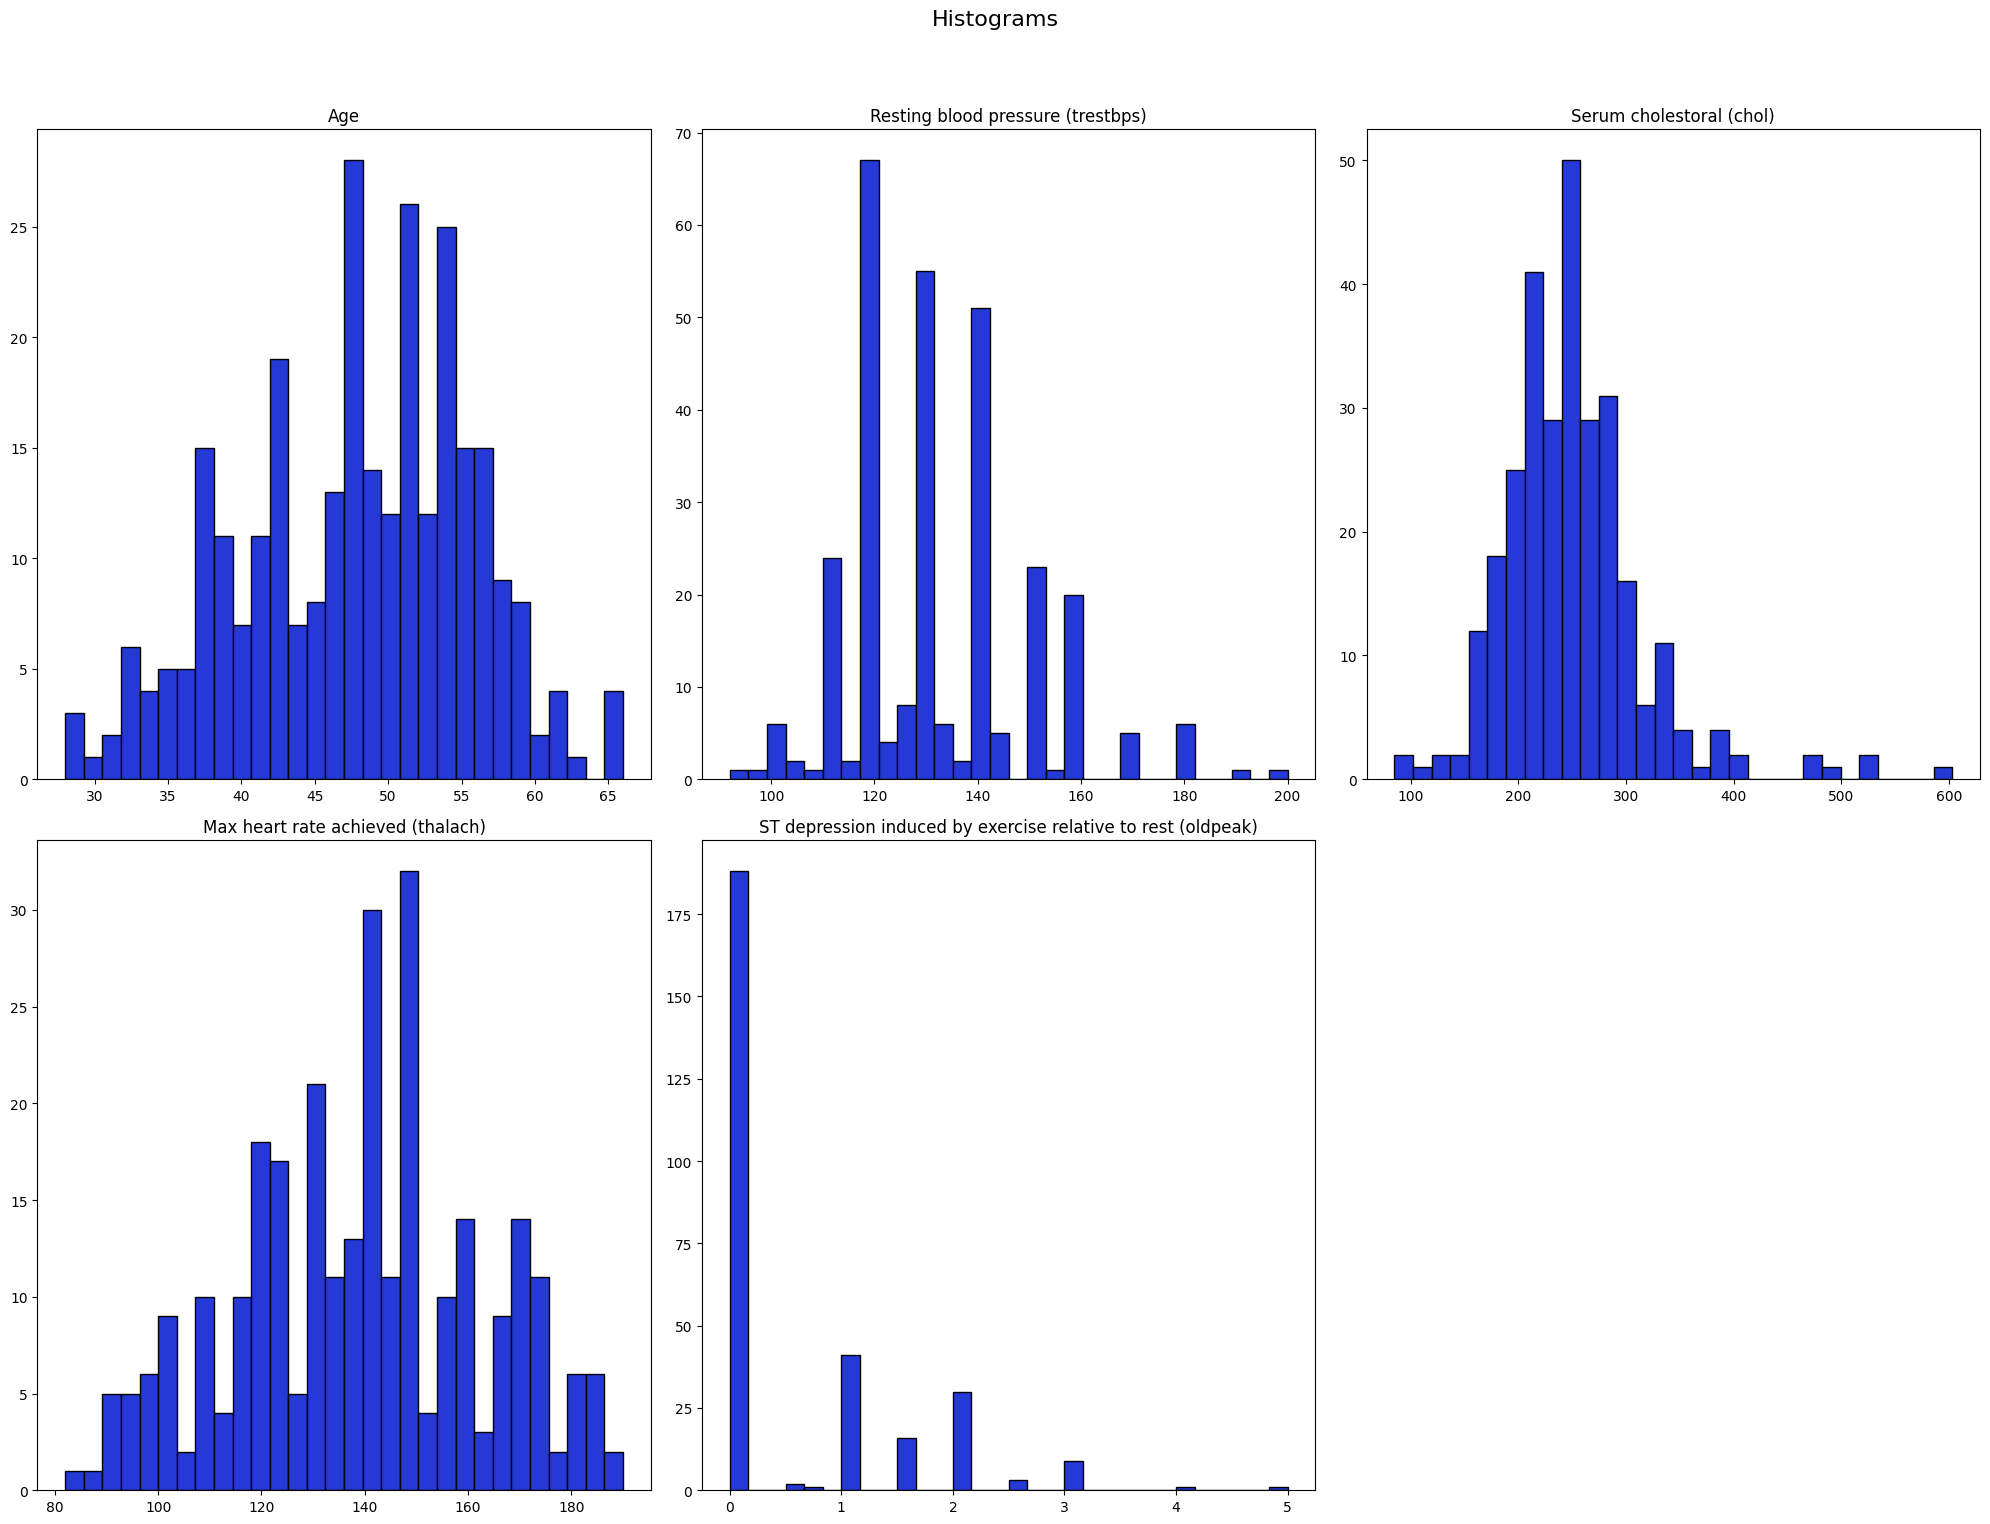

In [42]:
# Definir configuraciones del gráfico
color = '#2439d5'  # Color para los histogramas
nrows, ncols = 2, 3  # Tamaño de la rejilla: 2 filas y 3 columnas, ajustado según el número de características

# Crear una figura con una rejilla especificada de ejes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))  # Definir el tamaño de la figura completa
axes = axes.flatten()  # Aplanar el array 2D de ejes a 1D para facilitar la iteración. Para hacer un solo bucle, no dos

# Títulos para el histograma de cada característica numérica que se mostrará en los subgráficos
titles = [
    "Age", 
    "Resting blood pressure (trestbps)", 
    "Serum cholestoral (chol)", 
    "Max heart rate achieved (thalach)", 
    "ST depression induced by exercise relative to rest (oldpeak)"
]

# Iterar sobre cada eje e índice correspondiente de columna
for i, ax in enumerate(axes):
    if i >= len(df_num.columns):
        ax.set_visible(False)  # Si hay más subgráficos que columnas, ocultar los gráficos adicionales
        continue
    # Dibujar el histograma para la columna i
    ax.hist(df_num.iloc[:, i], bins=30, color=color, edgecolor='black')  # Dibujar histograma con 30 bins
    ax.set_title(titles[i])  # Establecer el título de cada subgráfico usando el título correspondiente

# Establecer título principal para toda la figura de gráficos
plt.suptitle('Histograms', fontsize=16)  # Título principal para la rejilla de histogramas

# Ajustar el diseño para asegurar que los subgráficos estén bien espaciados
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar el diseño para que el título principal no se superponga con los subgráficos

# Mostrar la figura compuesta con todos los histogramas
plt.show()  # Renderizar los gráficos visualmente

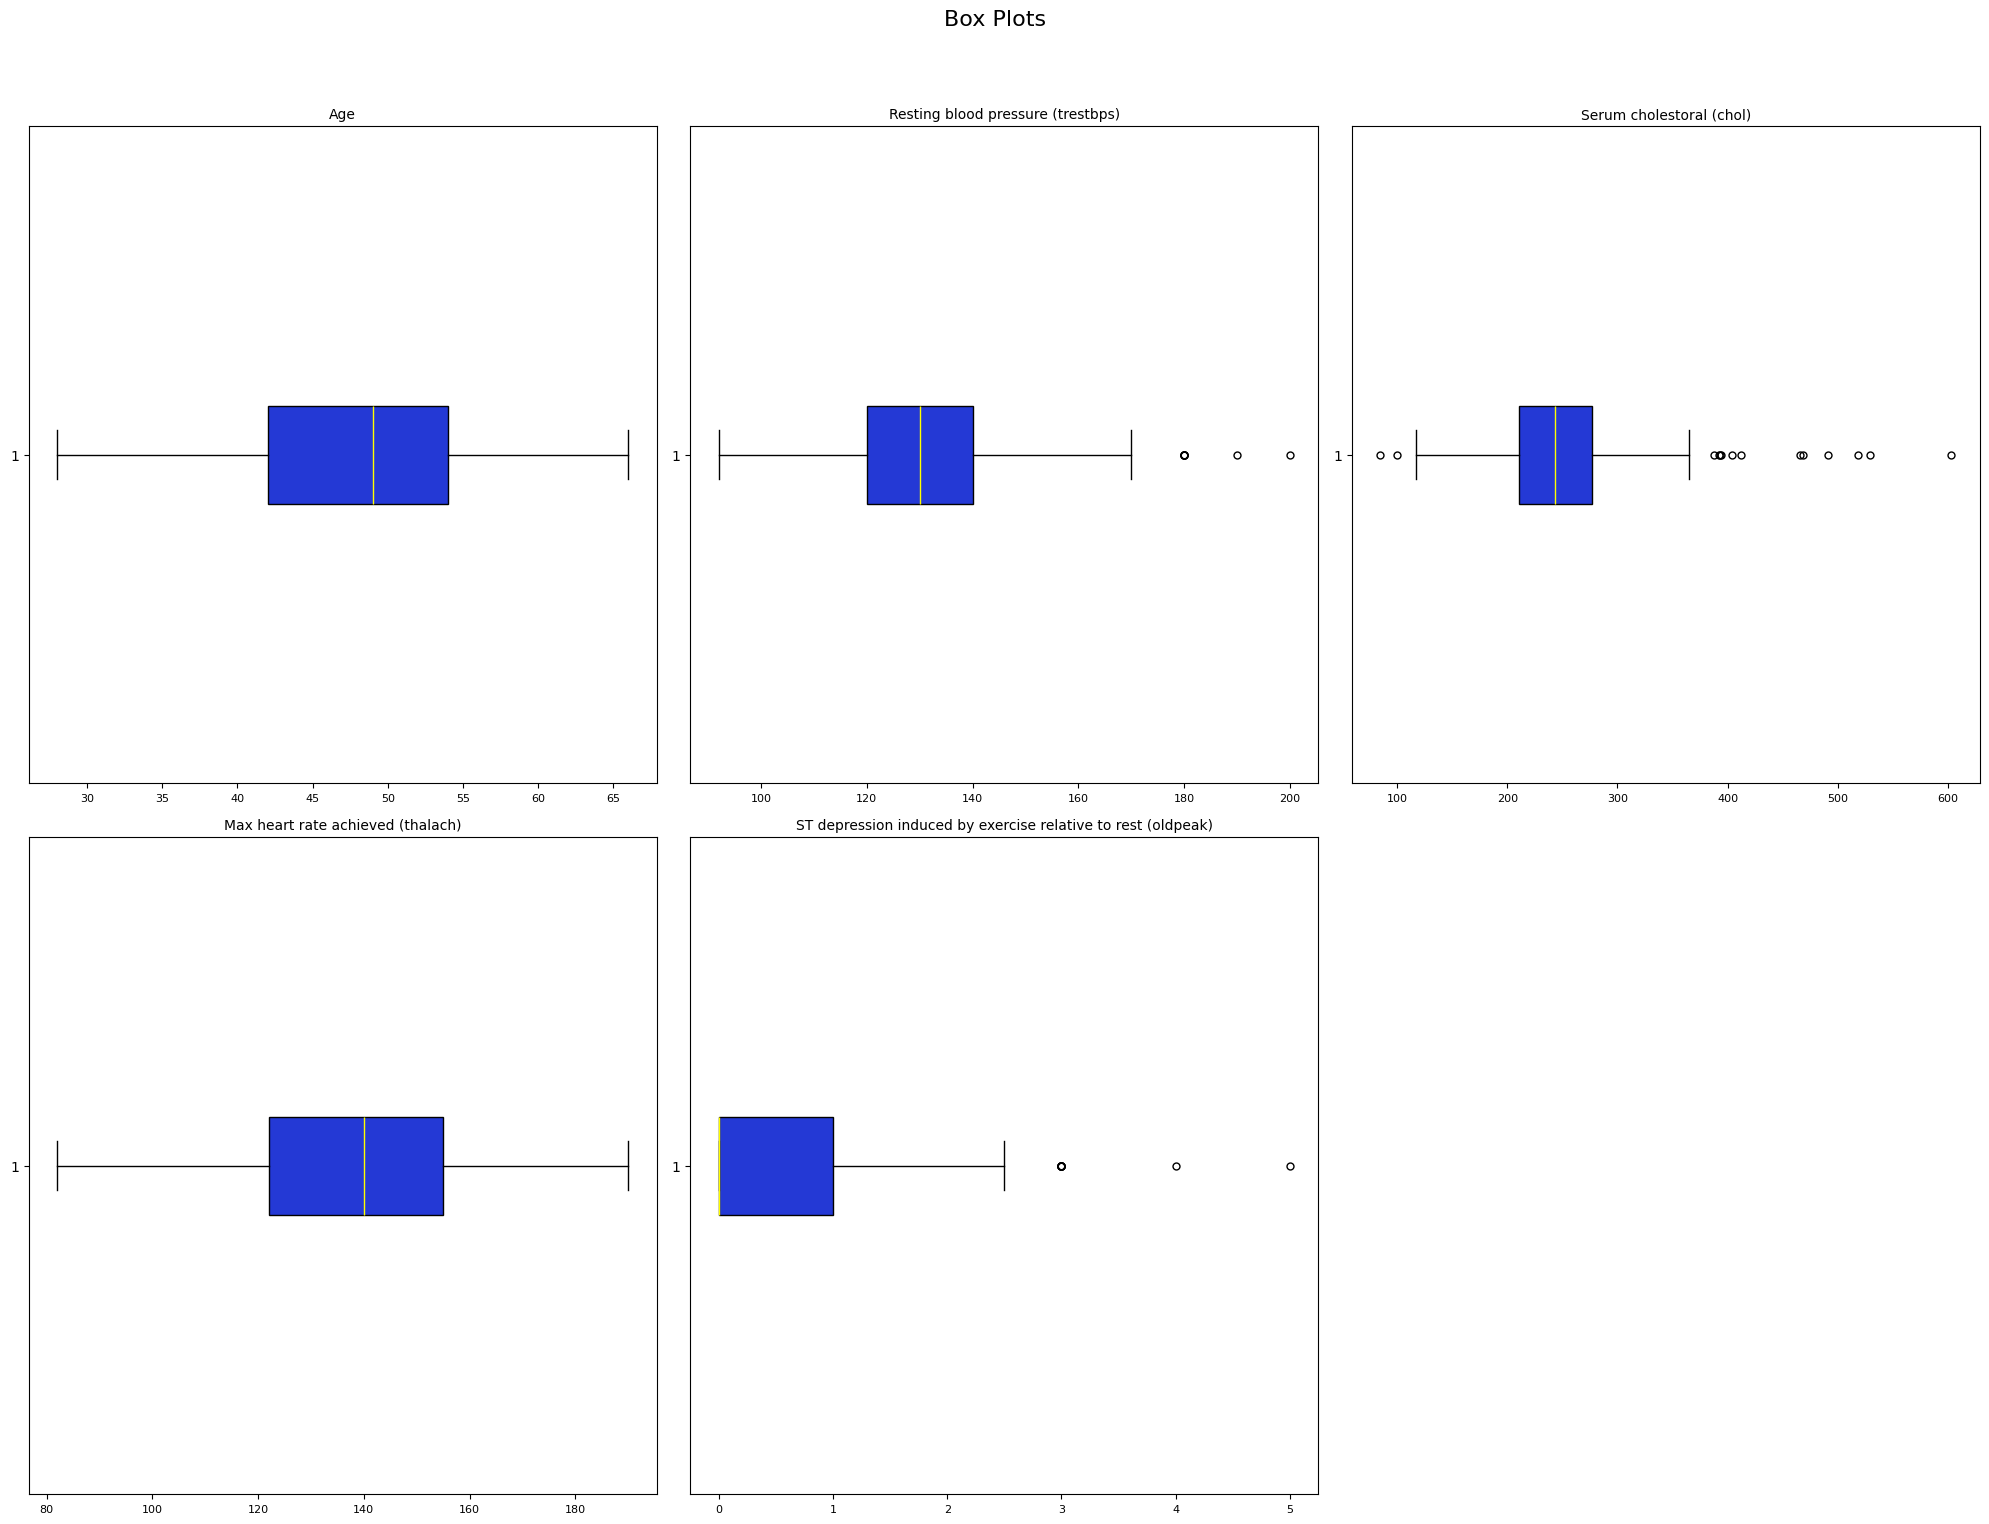

In [43]:
# Configuración del color y tamaño de la rejilla
color = '#2439d5'  # Color para las cajas de los box plots
nrows, ncols = 2, 3  # Tamaño de la rejilla: 2 filas y 3 columnas

# Crear una figura con una rejilla de ejes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))  # Configurar el tamaño total de la figura
axes = axes.flatten()  # Aplanar el array 2D de ejes a 1D para facilitar la iteración. Para recorrer en un solo bucle

# Títulos para cada box plot
titles = [
    "Age", 
    "Resting blood pressure (trestbps)", 
    "Serum cholestoral (chol)", 
    "Max heart rate achieved (thalach)", 
    "ST depression induced by exercise relative to rest (oldpeak)"
]

# Graficar box plots para cada columna
for i, ax in enumerate(axes):
    if i >= len(df_num.columns):
        ax.set_visible(False)  # Ocultar gráficos no utilizados
        continue
    ax.boxplot(df_num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'),  # Color y borde de la caja
               medianprops=dict(color='yellow'),  # Propiedades del mediano
               whiskerprops=dict(color='black'),  # Propiedades de las líneas de los bigotes
               capprops=dict(color='black'),  # Propiedades de los extremos de los bigotes
               flierprops=dict(marker='o', color='black', markersize=5))  # Propiedades de los outliers
    ax.set_title(titles[i], fontsize=10)  # Establecer el título para cada subgráfico
    ax.tick_params(axis='x', labelsize=8)  # Configurar el tamaño de las etiquetas en el eje x

# Establecer el título principal para toda la figura
plt.suptitle('Box Plots', fontsize=16)  # Título principal para la rejilla de box plots

# Ajustar el diseño
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar para dejar espacio para el título principal

# Mostrar los gráficos
plt.show()  # Renderizar las figuras para visualización

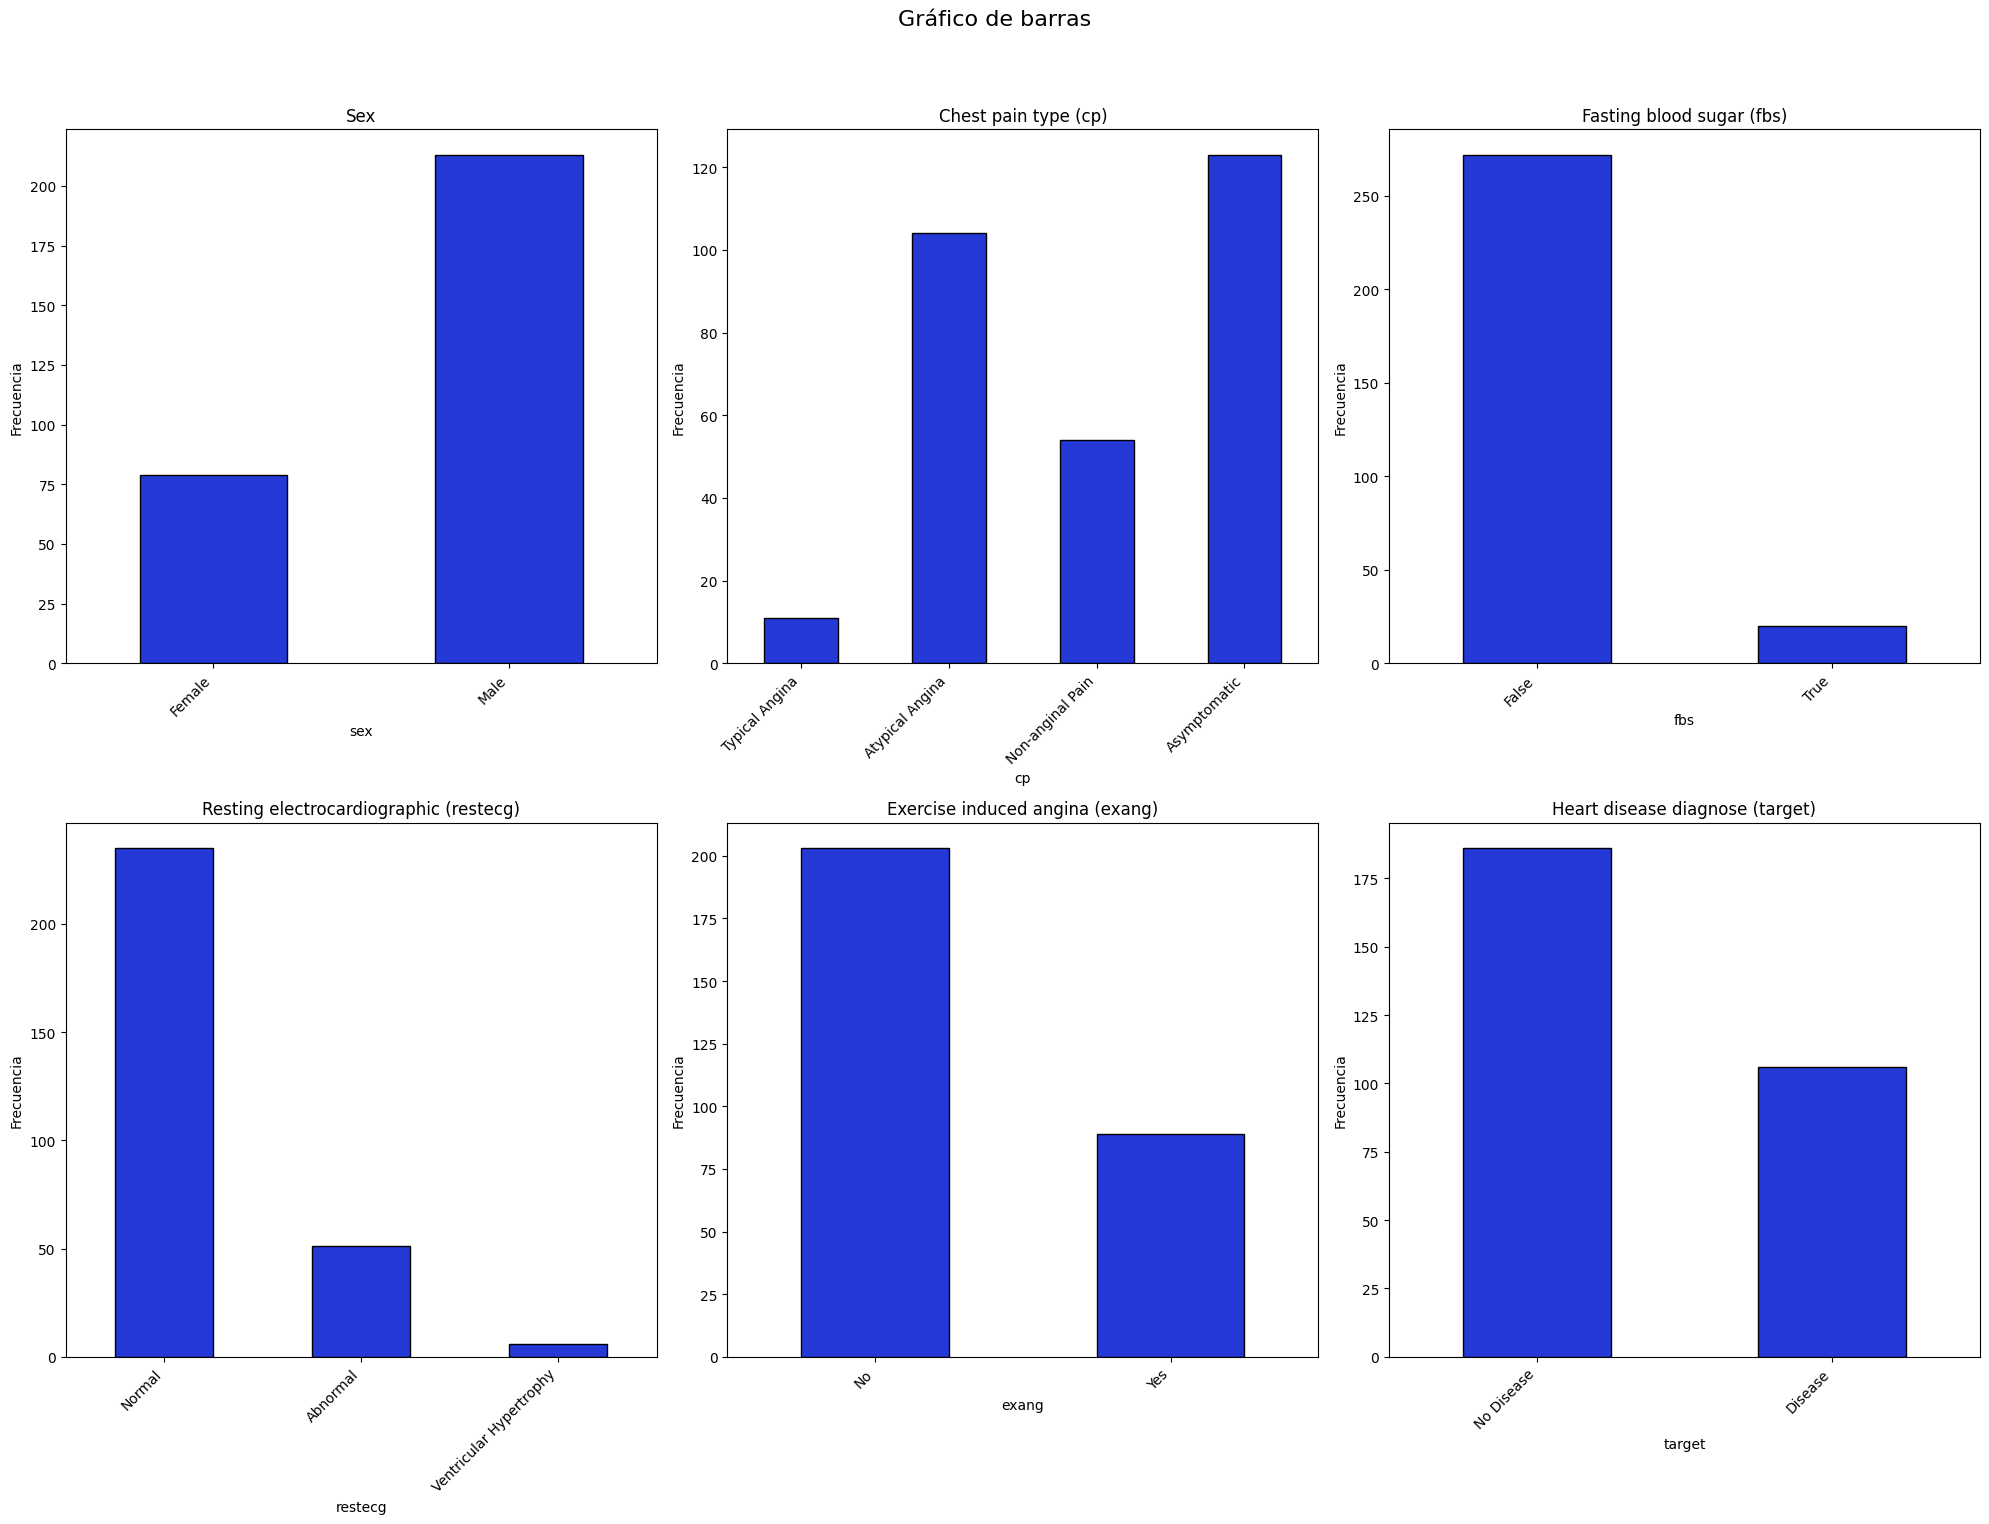

In [44]:
# Configuration of color and grid size
color = '#2439d5'
nrows, ncols = 2, 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

# Define titles for each categorical feature
titles = [
    "Sex", 
    "Chest pain type (cp)",
    "Fasting blood sugar (fbs)", 
    "Resting electrocardiographic (restecg)", 
    "Exercise induced angina (exang)", 
    "Heart disease diagnose (target)"
]

# Define the label mapping for each categorical feature
xlabels_list = [
    ['Female', 'Male'],
    ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'],
    ['False', 'True'],
    ['Normal', 'Abnormal', 'Ventricular Hypertrophy'],
    ['No', 'Yes'],
    ['No Disease', 'Disease']
]

# Plot each categorical feature
for i, ax in enumerate(axes):
    if i >= len(df_cat.columns):
        ax.set_visible(False)  # Hide unused subplots
        continue
    
    # Generate bar plot
    df_cat.iloc[:, i].value_counts().sort_index().plot(kind='bar', ax=ax, color=color, edgecolor='black')

    # Set the titles and custom x-tick labels
    ax.set_title(titles[i])  # Set title for each subplot
    ax.set_ylabel('Frecuencia')
    ax.set_xticklabels(xlabels_list[i], rotation=45, ha='right')  # Set custom x-tick labels

# Set a main title for the whole plot
plt.suptitle('Gráfico de barras', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [45]:
# One-hot encoder
# Generar dummies para la columna 'cp'
dummies_cp = pd.get_dummies(df[["cp"]], columns=["cp"], drop_first=True)*1

# Añadir las columnas dummy al original DataFrame
df = pd.concat([df, dummies_cp], axis=1)

In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'target', 'cp_2', 'cp_3', 'cp_4'],
      dtype='object')

In [47]:
# Eliminar columna 'cp' original
df.drop(columns=['cp'], inplace=True)

## 2. Balancear data

In [48]:
df.target.value_counts()

target
0    186
1    106
Name: count, dtype: int64

In [49]:
hearta_df = df[df.target==1]
no_hearta_df = df[df.target ==0].sample(len(hearta_df))
df_balanceado = pd.concat([hearta_df, no_hearta_df])

In [50]:
df_balanceado.target.value_counts()

target
1    106
0    106
Name: count, dtype: int64

## 3. X-y Split

In [51]:
y = df_balanceado['target']
X = df_balanceado.drop(columns=['target'], axis=1)
print(y.shape, X.shape)

(212,) (212, 12)


In [52]:
df_balanceado.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
cp_2        0
cp_3        0
cp_4        0
dtype: int64

## 4. Train - test data (80/20)

In [53]:
# Librerias clasificacion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((169, 12), (43, 12), (169,), (43,))

## 5. Modelos

In [56]:
# Logistic regression
mod_lr1 = LogisticRegression(max_iter=1000)
mod_lr1.fit(X_train, y_train) #Entrenamiento
y_pred_lr1 = mod_lr1.predict(X_test) 

# K-Nearest Neighbors (KNN)
mod_knn5 = KNeighborsClassifier(n_neighbors=5)
mod_knn5.fit(X_train, y_train) #Entrenamiento
y_pred_knn5 = mod_knn5.predict(X_test) #Predicción

# Decision Tree
mod_dt1 = DecisionTreeClassifier(random_state=42)
mod_dt1.fit(X_train, y_train) #Entrenamiento
y_pred_dt1 = mod_dt1.predict(X_test) #Predicción

# Random Forest
mod_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
mod_rf1.fit(X_train, y_train) #Entrenamiento
y_pred_rf1 = mod_rf1.predict(X_test) #Predicción

/Users/saraynes.gs/Documents/Ironhack/BigData/env_big_data/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6. Evaluación

In [57]:
# Mapeo de modelos con sus predicciones
predictions = {
    'lr1': y_pred_lr1,  # Predicciones del modelo de Regresión Logística
    'knn5': y_pred_knn5,  # Predicciones del modelo KNN
    'dt1': y_pred_dt1,  # Predicciones del modelo de Árbol de Decisión
    'rf1': y_pred_rf1  # Predicciones del modelo de Random Forest
}

# Listas para almacenar las métricas
accuracies = []  
precisions = []  
recalls = []  
f1_scores = []  

# Iterar sobre los modelos y calcular métricas
for name, pred in predictions.items():
    #print(f"Calculating metrics for model: {name}")  # Imprimir el modelo actual
    accuracies.append(accuracy_score(y_test, pred))  
    precisions.append(precision_score(y_test, pred))  
    recalls.append(recall_score(y_test, pred))  
    f1_scores.append(f1_score(y_test, pred))  

# Crear un DataFrame con las métricas
metrics = {
    'Model': ['Logistic Reg', 'KNN', 'Decision Tree', 'Random Forest'],  # Nombres de los modelos
    'Accuracy': accuracies,  # Lista de valores de precisión
    'Precision': precisions,  # Lista de valores de precision
    'Recall': recalls,  # Lista de valores de recall
    'F1 score': f1_scores  # Lista de valores de f1_score
}

# Crear el DataFrame con los resultados de las métricas
df_metrics = pd.DataFrame(metrics)

# Mostrar el DataFrame con las métricas redondeadas a dos decimales
print(df_metrics.set_index("Model").round(2))

               Accuracy  Precision  Recall  F1 score
Model                                               
Logistic Reg       0.86       0.84    0.84      0.84
KNN                0.65       0.58    0.74      0.65
Decision Tree      0.67       0.59    0.84      0.70
Random Forest      0.84       0.80    0.84      0.82


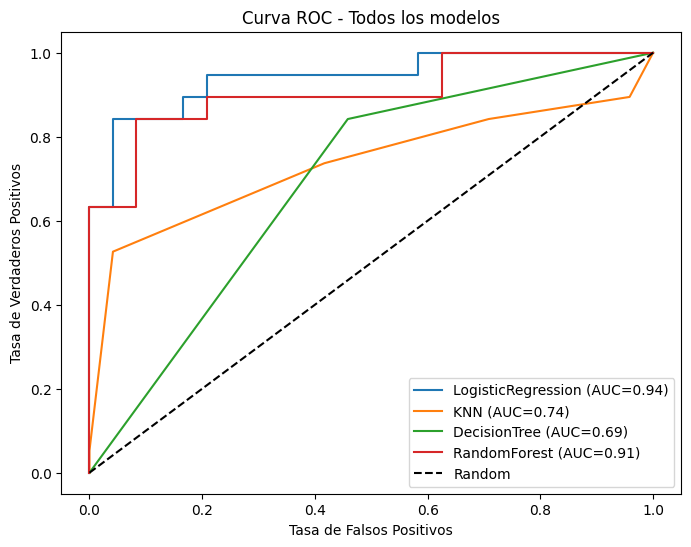

In [58]:
# Inicializar la figura para graficar
plt.figure(figsize=(8, 6))  # Configurar el tamaño de la figura para visualización

models_roc = {
    'LogisticRegression': mod_lr1,  # Modelo de Regresión Logística
    'KNN': mod_knn5,  # Modelo K-Nearest Neighbors
    'DecisionTree': mod_dt1,  # Modelo de Árbol de Decisión
    'RandomForest': mod_rf1  # Modelo de Random Forest
}

# Diccionario que contiene nombres de modelos e instancias
for nombre, modelo in models_roc.items():
    # Verificar si el modelo tiene el atributo predict_proba
    if hasattr(modelo, "predict_proba"):
        # Calcular probabilidades y métricas de la curva ROC
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]  # Probabilidades de clase positiva
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Calcular TPR y FPR usando roc_curve
        auc = roc_auc_score(y_test, y_pred_proba)  # Calcular el área bajo la curva ROC
        plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.2f})")  # Graficar la curva ROC con etiqueta

# Graficar la línea diagonal de referencia
plt.plot([0, 1], [0, 1], 'k--', label='Random')  # Línea diagonal para mostrar el rendimiento aleatorio

# Añadir etiquetas y título
plt.xlabel('Tasa de Falsos Positivos')  # Etiqueta para el eje X
plt.ylabel('Tasa de Verdaderos Positivos')  # Etiqueta para el eje Y
plt.title('Curva ROC - Todos los modelos')  # Título de la gráfica

# Añadir la leyenda
plt.legend()  # Mostrar la leyenda para identificar cada modelo

# Mostrar la gráfica
plt.show()  # Renderizar la gráfica para visualización

## 7. Standarizando las X

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
X_train.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'cp_2', 'cp_3', 'cp_4'],
      dtype='object')

In [61]:
X_train.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
cp_2        0
cp_3        0
cp_4        0
dtype: int64

In [62]:
X_train.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,cp_2,cp_3,cp_4
120,51,1,125.0,188.0,0.0,0,145,0,0.0,1,0,0
31,39,1,120.0,243.0,0.0,1,146,0,2.0,1,0,0
257,48,0,138.0,214.0,0.0,0,108,1,1.5,0,0,1
272,56,1,150.0,230.0,0.0,1,124,1,1.5,0,0,1
285,49,1,150.0,222.0,0.0,0,122,0,2.0,0,0,1


### Standarizando las variables numericas

In [63]:
X_train_num = X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
X_train_cat = X_train[['sex', 'cp_2', 'cp_3', 'cp_4', 'fbs', 'restecg', 'exang']]

X_test_num = X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
X_test_cat = X_test[['sex', 'cp_2', 'cp_3', 'cp_4', 'fbs', 'restecg', 'exang']]

In [64]:
X_test_num.isnull().sum()

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64

In [65]:
# Scale the numerical data
scaler = StandardScaler()
X_train_n_scaled = pd.DataFrame(scaler.fit_transform(X_train_num), columns=X_train_num.columns, index=X_train_num.index)
X_test_n_scaled = pd.DataFrame(scaler.fit_transform(X_test_num), columns=X_test_num.columns, index=X_test_num.index)


In [66]:
X_train_n_scaled.isnull().sum()

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64

In [67]:
X_test_n_scaled.isnull().sum()

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64

In [68]:
# Combine numerical and categorical data using join
X_train_scaled = X_train_cat.join(X_train_n_scaled)
X_test_scaled  = X_test_cat.join(X_test_n_scaled)

In [69]:
X_train_scaled.head()

,sex,cp_2,cp_3,cp_4,fbs,restecg,exang,age,trestbps,chol,thalach,oldpeak
120,1,1,0,0,0.0,0,0,0.419219,-0.477550,-1.042457,0.301934,-0.741805
31,1,1,0,0,0.0,1,0,-1.067102,-0.748376,-0.116636,0.343725,1.267250
257,0,0,0,1,0.0,0,1,0.047638,0.226596,-0.604796,-1.244334,0.764986
272,1,0,0,1,0.0,1,1,1.038519,0.876577,-0.335467,-0.575678,0.764986
285,1,0,0,1,0.0,0,0,0.171499,0.876577,-0.470131,-0.659260,1.267250


In [70]:
X_test_scaled.head()

,sex,cp_2,cp_3,cp_4,fbs,restecg,exang,age,trestbps,chol,thalach,oldpeak
218,1,0,0,1,0.0,0,1,0.836539,0.466062,-0.661133,-0.286075,2.629057
100,1,0,1,0,0.0,0,0,-0.147048,-1.333996,-0.556191,0.039785,-0.712306
52,0,0,1,0,0.0,1,0,-0.990122,-1.033987,-0.556191,-0.000947,-0.712306
263,1,0,0,1,0.0,0,1,0.415002,0.466062,1.469184,-0.530471,1.515269
248,1,0,0,1,0.0,0,1,1.117564,1.066081,-0.094448,-1.833914,2.629057


In [71]:
X_train.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,cp_2,cp_3,cp_4
120,51,1,125.0,188.0,0.0,0,145,0,0.0,1,0,0
31,39,1,120.0,243.0,0.0,1,146,0,2.0,1,0,0
257,48,0,138.0,214.0,0.0,0,108,1,1.5,0,0,1
272,56,1,150.0,230.0,0.0,1,124,1,1.5,0,0,1
285,49,1,150.0,222.0,0.0,0,122,0,2.0,0,0,1


In [72]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((169, 12), (43, 12), (169,), (43,))

### Modelos con variables numericas Standarizadas

In [73]:
# Modelos
# Logistic regression
mod_scaled_lr1 = LogisticRegression(max_iter=1000)
mod_scaled_lr1.fit(X_train_scaled, y_train) #Entrenamiento
y_pred_scaled_lr1 = mod_scaled_lr1.predict(X_test_scaled) 

# K-Nearest Neighbors (KNN)
mod_scaled_knn5 = KNeighborsClassifier(n_neighbors=5)
mod_scaled_knn5.fit(X_train_scaled, y_train) #Entrenamiento
y_pred_scaled_knn5 = mod_scaled_knn5.predict(X_test_scaled) #Predicción

# Decision Tree
mod_scaled_dt1 = DecisionTreeClassifier(random_state=42)
mod_scaled_dt1.fit(X_train_scaled, y_train) #Entrenamiento
y_pred_scaled_dt1 = mod_scaled_dt1.predict(X_test_scaled) #Predicción

# Random Forest
mod_scaled_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
mod_scaled_rf1.fit(X_train_scaled, y_train) #Entrenamiento
y_pred_scaled_rf1 = mod_scaled_rf1.predict(X_test_scaled) #Predicción

### Evaluación de modelos con variables numericas Standarizadas

In [74]:
# Mapping of models to their predictions
predictions = {
    'lr1': y_pred_scaled_lr1,
    'knn5': y_pred_scaled_knn5,
    'dt1': y_pred_scaled_dt1,
    'rf1': y_pred_scaled_rf1
}

# Initialize lists to store the metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop over the models and calculate metrics
for name, pred in predictions.items():
    accuracies.append(accuracy_score(y_test, pred))
    precisions.append(precision_score(y_test, pred))
    recalls.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))

# Create DataFrame with the metrics
metrics = {
    'Model': ['Logistic Reg', 'KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 score': f1_scores
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics.set_index("Model").round(2))  # Display the DataFrame

               Accuracy  Precision  Recall  F1 score
Model                                               
Logistic Reg       0.86       0.84    0.84      0.84
KNN                0.86       0.84    0.84      0.84
Decision Tree      0.74       0.65    0.89      0.76
Random Forest      0.84       0.80    0.84      0.82


### ROC curve con variables numericas Standarizadas

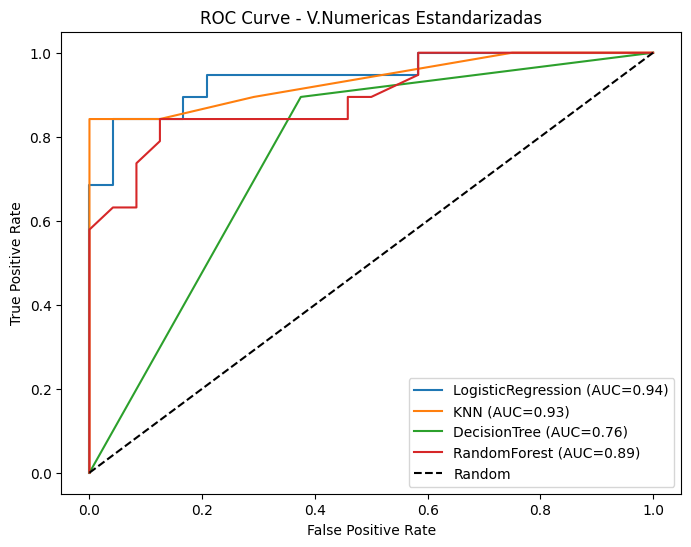

In [75]:
# Initialize figure for plotting
plt.figure(figsize=(8, 6))

# Dictionary containing model names and instances
for nombre, modelo in {
    'LogisticRegression': mod_scaled_lr1,
    'KNN': mod_scaled_knn5,
    'DecisionTree': mod_scaled_dt1,
    'RandomForest': mod_scaled_rf1
}.items():
    # Check if model has predict_proba attribute
    if hasattr(modelo, "predict_proba"):
        # Calculate probabilities and ROC curve metrics
        y_pred_proba = modelo.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Use roc_curve directly
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.2f})")

# Plot the diagonal line for baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - V.Numericas Estandarizadas')

# Add legend
plt.legend()

# Display plot
plt.show()

## 8. Normalizando las X

In [76]:
X_train_cat

,sex,cp_2,cp_3,cp_4,fbs,restecg,exang
120,1,1,0,0,0.0,0,0
31,1,1,0,0,0.0,1,0
257,0,0,0,1,0.0,0,1
272,1,0,0,1,0.0,1,1
285,1,0,0,1,0.0,0,0
...,...,...,...,...,...,...,...
79,1,1,0,0,0.0,0,1
202,1,0,0,1,0.0,0,0
280,1,0,0,1,0.0,0,1
7,1,1,0,0,0.0,0,0


In [77]:
X_train_log = np.log1p(X_train_num)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test_num)

In [78]:
# Combine numerical and categorical data using join
X_train_log = X_train_cat.join(X_train_log)
X_test_log = X_test_cat.join(X_test_log)

In [79]:
X_train_log.shape, X_test_log.shape, y_train.shape, y_test.shape

((169, 12), (43, 12), (169,), (43,))

### Modelos con variables numericas Normalizadas

In [80]:
# Modelos
# Logistic regression
mod_log_lr1 = LogisticRegression(max_iter=1000)
mod_log_lr1.fit(X_train_log, y_train) #Entrenamiento
y_pred_log_lr1 = mod_log_lr1.predict(X_test_log) 

# K-Nearest Neighbors (KNN)
mod_log_knn5 = KNeighborsClassifier(n_neighbors=5)
mod_log_knn5.fit(X_train_log, y_train) #Entrenamiento
y_pred_log_knn5 = mod_log_knn5.predict(X_test_log) #Predicción

# Decision Tree
mod_log_dt1 = DecisionTreeClassifier(random_state=42)
mod_log_dt1.fit(X_train_log, y_train) #Entrenamiento
y_pred_log_dt1 = mod_log_dt1.predict(X_test_log) #Predicción

# Random Forest
mod_log_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
mod_log_rf1.fit(X_train_log, y_train) #Entrenamiento
y_pred_log_rf1 = mod_log_rf1.predict(X_test_log) #Predicción

### Evaluación de modelos con variables numericas Normalizadas

In [81]:
# Mapping of models to their predictions
predictions = {
    'lr1': y_pred_log_lr1,
    'knn5': y_pred_log_knn5,
    'dt1': y_pred_log_dt1,
    'rf1': y_pred_log_rf1
}

# Initialize lists to store the metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop over the models and calculate metrics
for name, pred in predictions.items():
    accuracies.append(accuracy_score(y_test, pred))
    precisions.append(precision_score(y_test, pred))
    recalls.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))

# Create DataFrame with the metrics
metrics = {
    'Model': ['Logistic Reg', 'KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 score': f1_scores
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics.set_index("Model").round(2))  # Display the DataFrame

               Accuracy  Precision  Recall  F1 score
Model                                               
Logistic Reg       0.88       0.85    0.89      0.87
KNN                0.77       0.76    0.68      0.72
Decision Tree      0.70       0.62    0.84      0.71
Random Forest      0.86       0.84    0.84      0.84


### ROC curve con variables numericas Normalizadas

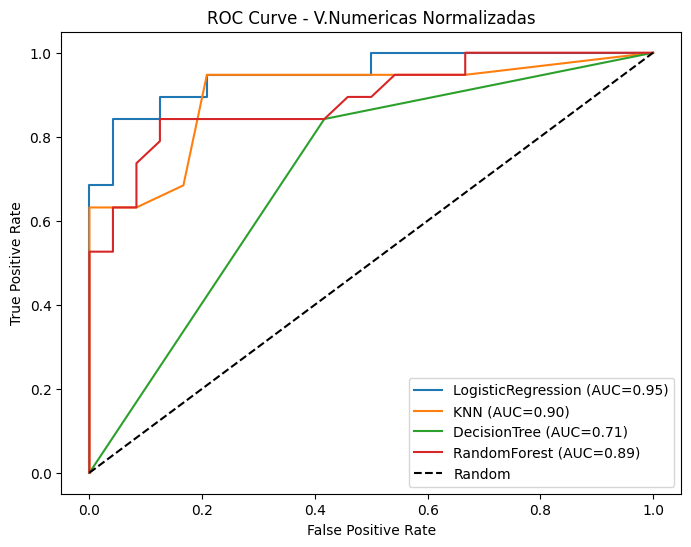

In [82]:
# Initialize figure for plotting
plt.figure(figsize=(8, 6))

# Dictionary containing model names and instances
for nombre, modelo in {
    'LogisticRegression': mod_log_lr1,
    'KNN': mod_log_knn5,
    'DecisionTree': mod_log_dt1,
    'RandomForest': mod_log_rf1
}.items():
    # Check if model has predict_proba attribute
    if hasattr(modelo, "predict_proba"):
        # Calculate probabilities and ROC curve metrics
        y_pred_proba = modelo.predict_proba(X_test_log)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Use roc_curve directly
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.2f})")

# Plot the diagonal line for baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - V.Numericas Normalizadas')

# Add legend
plt.legend()

# Display plot
plt.show()

## 9. Feature importance

### Feature importance Linear Regression Standarized Variables

In [83]:
mod_scaled_lr1

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


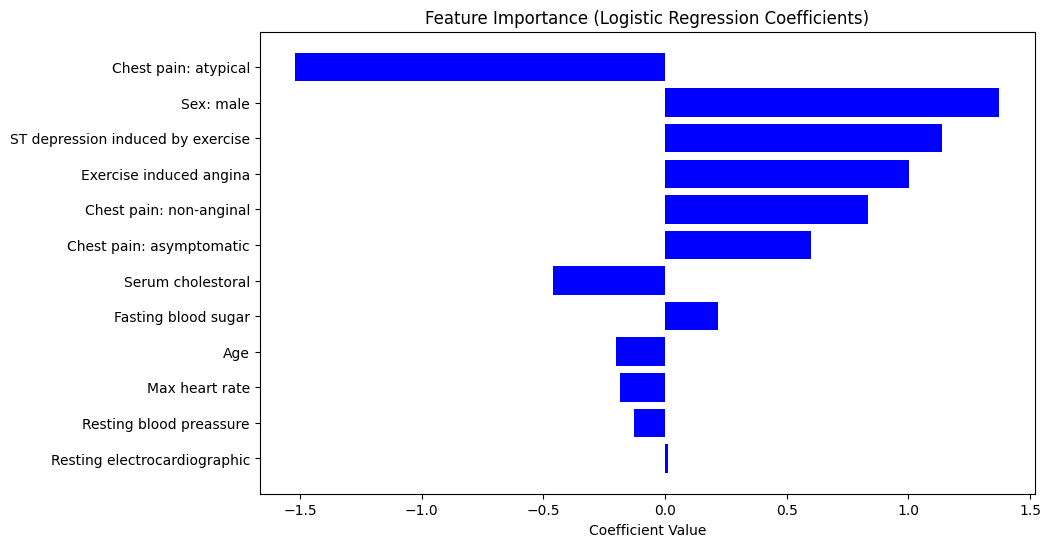

In [84]:
# Extract the coefficients and feature names
coefficients = mod_scaled_lr1.coef_[0]  # For binary classification, coefficients is a 2D array
features = X_train_scaled.columns

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute value of the coefficient
feature_importance['AbsCoefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='AbsCoefficient', ascending=False)

# Define custom labels for the y-axis
custom_labels = [
    "Chest pain: atypical",
    "Sex: male",
    "ST depression induced by exercise",
    "Exercise induced angina",
    "Chest pain: non-anginal",
    "Chest pain: asymptomatic",
    "Serum cholestoral",
    "Fasting blood sugar",
    "Age",
    "Max heart rate",
    "Resting blood preassure",
    "Resting electrocardiographic"
]

# Plot the feature importance with custom labels
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.yticks(ticks=range(len(custom_labels)), labels=custom_labels)
plt.gca().invert_yaxis()  # Largest first
plt.show()

### Feature importance Random Forest Normalized Variables

In [85]:
mod_log_rf1

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [86]:
feature_names = list(X_train_log.columns)
importances = mod_log_rf1.feature_importances_
indices = np.argsort(importances)[::-1] # sorts indices of importances in descending order

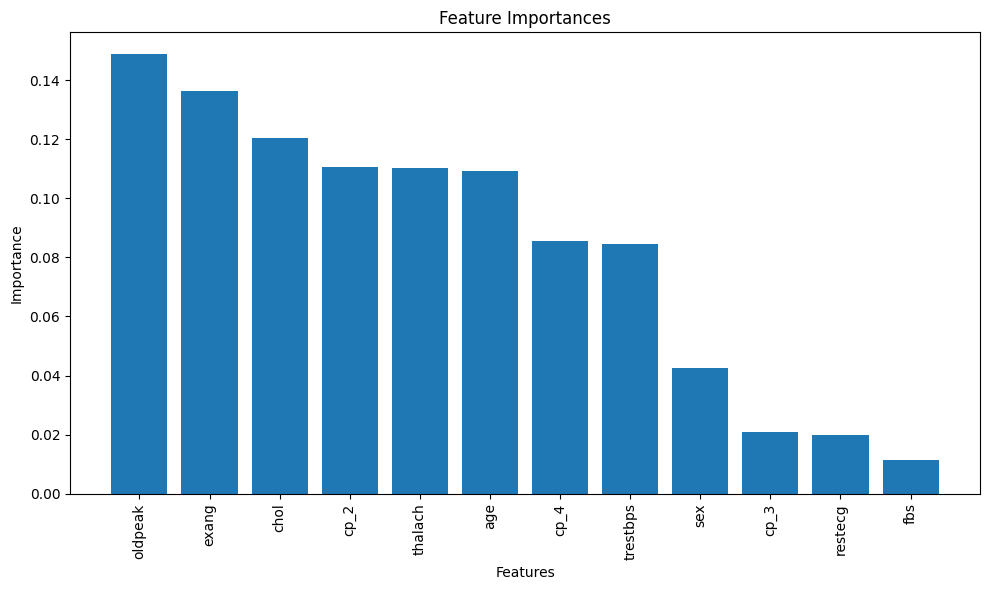

In [87]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

## 10. Hyperparameter Tuning

### Hyperparameter tuning Linear Regression Standarized Variables

In [88]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # 'l1' is used with the 'liblinear' solver
    'solver': ['liblinear', 'saga']  # 'saga' works with both 'l1' and 'l2'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(mod_scaled_lr1, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate on the test set
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-validation Accuracy: 0.8110516934046345
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.85      0.89      0.87        19

    accuracy                           0.88        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.89      0.88      0.88        43



Parameters:

- **C**: Regularization strength parameter. Smaller values specify stronger regularization.
- **penalty**: Type of regularization ('l1' for Lasso and 'l2' for Ridge).
- **solver**: Algorithm to use in the optimization problem. liblinear works with small datasets and supports 'l1'.

### Hyperparameter tuning Random Forest model with Normalized Variables

In [89]:
parameters = {
    'bootstrap': [True],
    'max_depth': [20, 40, 60, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [200, 400, 600]
}

In [90]:
mod_log_rf1

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [91]:
model = GridSearchCV(mod_log_rf1, parameters)
model.fit(X_train_log, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True], 'max_depth': [20, 40, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,400


In [92]:
predictions = model.predict(X_test_log)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.76      0.84      0.80        19

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.81        43
weighted avg       0.82      0.81      0.81        43



In [93]:
# Display the best parameters
print("Best Parameters:", model.best_params_)
print("Best Cross-validation Accuracy:", model.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best Cross-validation Accuracy: 0.7875222816399287
